In [1]:
import os
import pandas as pd
import torch

from fairseq_signals.utils.store import MemmapReader

/Users/victorli/Documents/GitHub/ECG-Time-Series/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/victorli/Documents/GitHub/ECG-Time-Series/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
root = os.getcwd()
root

'/Users/victorli/Documents/GitHub/ECG-Time-Series'

In [3]:
fairseq_signals_root = os.path.join(root, "fairseq_signals")
fairseq_signals_root = fairseq_signals_root.rstrip('/')
fairseq_signals_root

'/Users/victorli/Documents/GitHub/ECG-Time-Series/fairseq_signals'

In [4]:
from huggingface_hub import hf_hub_download

_ = hf_hub_download(
    repo_id='wanglab/ecg-fm-preprint',
    filename='physionet_finetuned.pt',
    local_dir=os.path.join(root, 'ckpts'),
)
_ = hf_hub_download(
    repo_id='wanglab/ecg-fm-preprint',
    filename='physionet_finetuned.yaml',
    local_dir=os.path.join(root, 'ckpts'),
)

In [5]:
from huggingface_hub import hf_hub_download

_ = hf_hub_download(
    repo_id='wanglab/ecg-fm-preprint',
    filename='mimic_iv_ecg_physionet_pretrained.pt',
    local_dir=os.path.join(root, 'ckpts'),
)
_ = hf_hub_download(
    repo_id='wanglab/ecg-fm-preprint',
    filename='mimic_iv_ecg_physionet_pretrained.yaml',
    local_dir=os.path.join(root, 'ckpts'),
)

In [6]:
from fairseq_signals.models import build_model_from_checkpoint

model_pretrained = build_model_from_checkpoint(
    checkpoint_path=os.path.join(root, 'ckpts/mimic_iv_ecg_physionet_pretrained.pt')
)
model_pretrained

/Users/victorli/Documents/GitHub/ECG-Time-Series/fairseq-signals/fairseq_signals/utils/checkpoint_utils.py:268: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.l

Wav2Vec2CMSCModel(
  (dropout_input): Dropout(p=0.1, inplace=False)
  (dropout_features): Dropout(p=0.1, inplace=False)
  (encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-11): 12 x TransformerEncoderLayer(
        (self_attn): MultiHeadAttention(
          (dropout): Dropout()
          (k_proj): Linear(in_features=768, out_features=768, bias=True)
          (v_proj): Linear(in_features=768, out_features=768, bias=True)
          (q_proj): Linear(in_features=768, out_features=768, bias=True)
          (out_proj): Linear(in_features=768, out_features=768, bias=True)
        )
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.0, inplace=False)
        (dropout3): Dropout(p=0.1, inplace=False)
        (self_attn_layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (fc1): Linear(in_features=768, out_features=3072, bias=True)
        (fc2): Linear(in_features=3072, out_features=768, bias=True)
        (final_layer_norm):

In [15]:
segmented_split = pd.read_csv(
    os.path.join(root, 'data/code_15/segmented_split_incomplete.csv'),
    index_col='idx',
)
segmented_split['path'] = (root + '/data/code_15/segmented/') + segmented_split['path']
segmented_split.to_csv(os.path.join(root, 'data/code_15/segmented_split.csv'))
segmented_split

,save_file,split,path,sample_size
idx,,,,
0,code_15_438277.mat,test,/Users/victorli/Documents/GitHub/ECGFM/data/co...,2500
1,code_15_358121.mat,test,/Users/victorli/Documents/GitHub/ECGFM/data/co...,2500
2,code_15_1594286.mat,test,/Users/victorli/Documents/GitHub/ECGFM/data/co...,2500
2,code_15_1594286.mat,test,/Users/victorli/Documents/GitHub/ECGFM/data/co...,2500
3,code_15_975093.mat,test,/Users/victorli/Documents/GitHub/ECGFM/data/co...,2500
3,code_15_975093.mat,test,/Users/victorli/Documents/GitHub/ECGFM/data/co...,2500
4,code_15_795649.mat,test,/Users/victorli/Documents/GitHub/ECGFM/data/co...,2500
5,code_15_1238362.mat,test,/Users/victorli/Documents/GitHub/ECGFM/data/co...,2500
6,code_15_2969044.mat,test,/Users/victorli/Documents/GitHub/ECGFM/data/co...,2500


In [31]:
print(f"""cd {fairseq_signals_root}/scripts/preprocess
python manifests.py \\
    --split_file_paths "{root}/data/code_15/segmented_split.csv" \\
    --save_dir "{root}/data/manifests/code_15_subset10/"
""")

cd /Users/victorli/Documents/GitHub/ECGFM/fairseq_signals/scripts/preprocess
python manifests.py \
    --split_file_paths "/Users/victorli/Documents/GitHub/ECGFM/data/code_15/segmented_split.csv" \
    --save_dir "/Users/victorli/Documents/GitHub/ECGFM/data/manifests/code_15_subset10/"



In [33]:
print(f"""fairseq-hydra-inference \\
    task.data="{root}/data/manifests/code_15_subset10/" \\
    common_eval.path="{root}/ckpts/physionet_finetuned.pt" \\
    common_eval.results_path="{root}/outputs" \\
    model.num_labels=26 \\
    dataset.valid_subset="test" \\
    dataset.batch_size=10 \\
    dataset.num_workers=3 \\
    dataset.disable_validation=false \\
    distributed_training.distributed_world_size=1 \\
    distributed_training.find_unused_parameters=True \\
    --config-dir "{root}/ckpts" \\
    --config-name physionet_finetuned
""")

fairseq-hydra-inference \
    task.data="/Users/victorli/Documents/GitHub/ECGFM/data/manifests/code_15_subset10/" \
    common_eval.path="/Users/victorli/Documents/GitHub/ECGFM/ckpts/physionet_finetuned.pt" \
    common_eval.results_path="/Users/victorli/Documents/GitHub/ECGFM/outputs" \
    model.num_labels=26 \
    dataset.valid_subset="test" \
    dataset.batch_size=10 \
    dataset.num_workers=3 \
    dataset.disable_validation=false \
    distributed_training.distributed_world_size=1 \
    distributed_training.find_unused_parameters=True \
    --config-dir "/Users/victorli/Documents/GitHub/ECGFM/ckpts" \
    --config-name physionet_finetuned



In [34]:
physionet2021_label_def = pd.read_csv(
    os.path.join(root, 'data/physionet2021/labels/label_def.csv'),
     index_col='name',
)
physionet2021_label_names = physionet2021_label_def.index
physionet2021_label_def

,pos_count_all,pos_percent_all
name,,
AF,5230,0.060793
AFL,8271,0.096142
BBB,490,0.005696
Brady,283,0.003290
CLBBB|LBBB,1487,0.017285
CRBBB|RBBB,4794,0.055725
IAVB,3516,0.040870
IRBBB,1854,0.021551
LAD,7614,0.088505


In [35]:
# Load the array of computed logits
logits = MemmapReader.from_header(
    os.path.join(root, 'outputs/outputs_test.npy')
)[:]
logits.shape

(14, 26)

In [36]:
# Construct predictions from logits
pred = pd.DataFrame(
    torch.sigmoid(torch.tensor(logits)).numpy(),
    columns=physionet2021_label_names,
)

# Join in sample information
pred = segmented_split.reset_index().join(pred, how='left').set_index('idx')
pred

,save_file,split,path,sample_size,AF,AFL,BBB,Brady,CLBBB|LBBB,CRBBB|RBBB,...,PR,PRWP,PVC|VPB,QAb,RAD,SA,SB,STach,TAb,TInv
idx,,,,,,,,,,,,,,,,,,,,,
0,code_15_438277.mat,test,/Users/victorli/Documents/GitHub/ECGFM/data/co...,2500,0.001141,0.001432,1.450403e-15,3.197928e-01,1.061166e-06,0.004387,...,1.062418e-07,1.599575e-11,7.964937e-02,8.610878e-08,3.981902e-15,2.315427e-03,4.730718e-04,0.000044,0.006329,0.000018
1,code_15_358121.mat,test,/Users/victorli/Documents/GitHub/ECGFM/data/co...,2500,0.002228,0.000039,9.150768e-09,1.076871e-09,4.547553e-06,0.999969,...,1.411668e-08,9.048138e-14,6.399634e-07,1.941964e-06,1.123854e-07,4.888778e-03,1.618196e-07,0.000800,0.066864,0.006783
2,code_15_1594286.mat,test,/Users/victorli/Documents/GitHub/ECGFM/data/co...,2500,0.000137,0.000008,1.439267e-11,3.531816e-07,8.588602e-02,0.997255,...,1.371483e-07,2.956340e-11,3.546473e-10,4.864397e-03,2.948090e-06,4.930414e-04,1.902638e-02,0.000456,0.000525,0.000306
2,code_15_1594286.mat,test,/Users/victorli/Documents/GitHub/ECGFM/data/co...,2500,0.000075,0.010803,3.184374e-09,6.290180e-05,3.410370e-03,0.999825,...,7.741709e-05,6.373053e-09,7.745803e-08,1.696541e-05,6.911856e-09,9.537303e-06,1.779040e-04,0.000299,0.000291,0.000464
3,code_15_975093.mat,test,/Users/victorli/Documents/GitHub/ECGFM/data/co...,2500,0.000080,0.005701,7.487220e-10,7.197569e-05,1.000095e-08,0.000279,...,3.433957e-06,5.400282e-11,9.678003e-04,4.870715e-05,1.037316e-06,1.559728e-02,9.264474e-01,0.000855,0.000948,0.001306
3,code_15_975093.mat,test,/Users/victorli/Documents/GitHub/ECGFM/data/co...,2500,0.000025,0.000407,6.027177e-10,2.198460e-03,1.805496e-08,0.001132,...,3.720797e-08,8.039125e-11,1.284600e-04,1.156048e-05,8.957616e-09,6.187672e-05,6.662923e-02,0.001178,0.000136,0.000324
4,code_15_795649.mat,test,/Users/victorli/Documents/GitHub/ECGFM/data/co...,2500,0.002984,0.000056,1.550808e-11,2.358702e-06,2.732691e-08,0.255057,...,6.479541e-09,2.662188e-12,1.025913e-05,4.712005e-07,1.772920e-11,1.501582e-06,8.759248e-07,0.480391,0.007393,0.005395
5,code_15_1238362.mat,test,/Users/victorli/Documents/GitHub/ECGFM/data/co...,2500,0.005586,0.000025,2.415337e-09,6.344774e-02,2.997731e-01,0.136166,...,6.169271e-07,2.739337e-10,4.723300e-01,1.177879e-07,1.028900e-11,5.534922e-04,8.178954e-01,0.000008,0.086982,0.004796
6,code_15_2969044.mat,test,/Users/victorli/Documents/GitHub/ECGFM/data/co...,2500,0.005421,0.000166,1.272731e-08,1.460008e-05,1.534868e-07,0.000079,...,5.963611e-09,5.494700e-17,3.073125e-03,1.719055e-06,6.095560e-10,1.015366e-08,9.371452e-06,0.998790,0.038503,0.000881


In [37]:
# Perform a (crude) thresholding of 0.5 for all labels
pred_thresh = pred.copy()
pred_thresh[physionet2021_label_names] = pred_thresh[physionet2021_label_names] > 0.5

# Construct a readable column of predicted labels for each sample
pred_thresh['labels'] = pred_thresh[physionet2021_label_names].apply(
    lambda row: ', '.join(row.index[row]),
    axis=1,
)
pred_thresh['labels']

idx
0                    IAVB
1              CRBBB|RBBB
2    CRBBB|RBBB, LAD, NSR
2              CRBBB|RBBB
3                IAVB, SB
3                    IAVB
4                PAC|SVPB
5                      SB
6                   STach
6                   STach
7                    IAVB
8                   Brady
9    CRBBB|RBBB, PAC|SVPB
9    CRBBB|RBBB, PAC|SVPB
Name: labels, dtype: object

In [38]:
code_15_label_def = pd.read_csv(
    os.path.join(root, 'data/code_15/labels/label_def.csv'),
     index_col='name',
)
code_15_label_names = code_15_label_def.index
code_15_label_def

,pos_count_all,pos_percent_all
name,,
is_male,138528,0.402691
1dAVb,5699,0.016567
RBBB,9652,0.028058
LBBB,6011,0.017474
SB,5588,0.016244
ST,7571,0.022008
AF,7008,0.020372
normal_ecg,134497,0.390973


In [39]:
label_mapping = {
    'CRBBB|RBBB': 'RBBB',
    'CLBBB|LBBB': 'LBBB',
    'SB': 'SB',
    'STach': 'ST',
    'AF': 'AF',
}

physionet2021_label_def['name_mapped'] = physionet2021_label_def.index.map(label_mapping)
physionet2021_label_def

,pos_count_all,pos_percent_all,name_mapped
name,,,
AF,5230,0.060793,AF
AFL,8271,0.096142,NaN
BBB,490,0.005696,NaN
Brady,283,0.003290,NaN
CLBBB|LBBB,1487,0.017285,LBBB
CRBBB|RBBB,4794,0.055725,RBBB
IAVB,3516,0.040870,NaN
IRBBB,1854,0.021551,NaN
LAD,7614,0.088505,NaN


In [40]:
pred_mapped = pred.copy()
pred_mapped.drop(set(physionet2021_label_names) - set(label_mapping.keys()), axis=1, inplace=True)
pred_mapped.rename(label_mapping, axis=1, inplace=True)
pred_mapped

,save_file,split,path,sample_size,AF,LBBB,RBBB,SB,ST
idx,,,,,,,,,
0,code_15_438277.mat,test,/Users/victorli/Documents/GitHub/ECGFM/data/co...,2500,0.001141,1.061166e-06,0.004387,4.730718e-04,0.000044
1,code_15_358121.mat,test,/Users/victorli/Documents/GitHub/ECGFM/data/co...,2500,0.002228,4.547553e-06,0.999969,1.618196e-07,0.000800
2,code_15_1594286.mat,test,/Users/victorli/Documents/GitHub/ECGFM/data/co...,2500,0.000137,8.588602e-02,0.997255,1.902638e-02,0.000456
2,code_15_1594286.mat,test,/Users/victorli/Documents/GitHub/ECGFM/data/co...,2500,0.000075,3.410370e-03,0.999825,1.779040e-04,0.000299
3,code_15_975093.mat,test,/Users/victorli/Documents/GitHub/ECGFM/data/co...,2500,0.000080,1.000095e-08,0.000279,9.264474e-01,0.000855
3,code_15_975093.mat,test,/Users/victorli/Documents/GitHub/ECGFM/data/co...,2500,0.000025,1.805496e-08,0.001132,6.662923e-02,0.001178
4,code_15_795649.mat,test,/Users/victorli/Documents/GitHub/ECGFM/data/co...,2500,0.002984,2.732691e-08,0.255057,8.759248e-07,0.480391
5,code_15_1238362.mat,test,/Users/victorli/Documents/GitHub/ECGFM/data/co...,2500,0.005586,2.997731e-01,0.136166,8.178954e-01,0.000008
6,code_15_2969044.mat,test,/Users/victorli/Documents/GitHub/ECGFM/data/co...,2500,0.005421,1.534868e-07,0.000079,9.371452e-06,0.998790


In [41]:
pred_thresh_mapped = pred_thresh.copy()
pred_thresh_mapped.drop(set(physionet2021_label_names) - set(label_mapping.keys()), axis=1, inplace=True)
pred_thresh_mapped.rename(label_mapping, axis=1, inplace=True)
pred_thresh_mapped['predicted'] = pred_thresh_mapped[label_mapping.values()].apply(
    lambda row: ', '.join(row.index[row]),
    axis=1,
)
pred_thresh_mapped

,save_file,split,path,sample_size,AF,LBBB,RBBB,SB,ST,labels,predicted
idx,,,,,,,,,,,
0,code_15_438277.mat,test,/Users/victorli/Documents/GitHub/ECGFM/data/co...,2500,False,False,False,False,False,IAVB,
1,code_15_358121.mat,test,/Users/victorli/Documents/GitHub/ECGFM/data/co...,2500,False,False,True,False,False,CRBBB|RBBB,RBBB
2,code_15_1594286.mat,test,/Users/victorli/Documents/GitHub/ECGFM/data/co...,2500,False,False,True,False,False,"CRBBB|RBBB, LAD, NSR",RBBB
2,code_15_1594286.mat,test,/Users/victorli/Documents/GitHub/ECGFM/data/co...,2500,False,False,True,False,False,CRBBB|RBBB,RBBB
3,code_15_975093.mat,test,/Users/victorli/Documents/GitHub/ECGFM/data/co...,2500,False,False,False,True,False,"IAVB, SB",SB
3,code_15_975093.mat,test,/Users/victorli/Documents/GitHub/ECGFM/data/co...,2500,False,False,False,False,False,IAVB,
4,code_15_795649.mat,test,/Users/victorli/Documents/GitHub/ECGFM/data/co...,2500,False,False,False,False,False,PAC|SVPB,
5,code_15_1238362.mat,test,/Users/victorli/Documents/GitHub/ECGFM/data/co...,2500,False,False,False,True,False,SB,SB
6,code_15_2969044.mat,test,/Users/victorli/Documents/GitHub/ECGFM/data/co...,2500,False,False,False,False,True,STach,ST


In [42]:
code_15_labels = pd.read_csv(os.path.join(root, 'data/code_15/labels/labels.csv'), index_col='idx')
code_15_labels['actual'] = code_15_labels[label_mapping.values()].apply(
    lambda row: ', '.join(row.index[row]),
    axis=1,
)
code_15_labels

,is_male,1dAVb,RBBB,LBBB,SB,ST,AF,normal_ecg,actual
idx,,,,,,,,,
0,True,True,False,False,False,False,False,False,
1,True,False,True,False,False,False,False,False,RBBB
2,False,False,True,False,False,False,False,False,RBBB
3,True,True,False,False,False,False,False,False,
4,True,False,False,False,False,True,False,False,ST
5,True,False,False,False,True,False,False,False,SB
6,False,False,False,False,False,True,False,False,ST
7,False,True,False,False,False,False,False,False,
8,True,False,False,False,True,False,False,False,SB


In [43]:
# Visualize predicted and actual labels side-by-side
pred_thresh_mapped[['predicted']].join(code_15_labels[['actual']], how='left')

,predicted,actual
idx,,
0,,
1,RBBB,RBBB
2,RBBB,RBBB
2,RBBB,RBBB
3,SB,
3,,
4,,ST
5,SB,SB
6,ST,ST


dict_keys(['__header__', '__version__', '__globals__', 'org_sample_rate', 'curr_sample_rate', 'org_sample_size', 'curr_sample_size', 'feats', 'idx', 'mean', 'std', 'segment_i'])


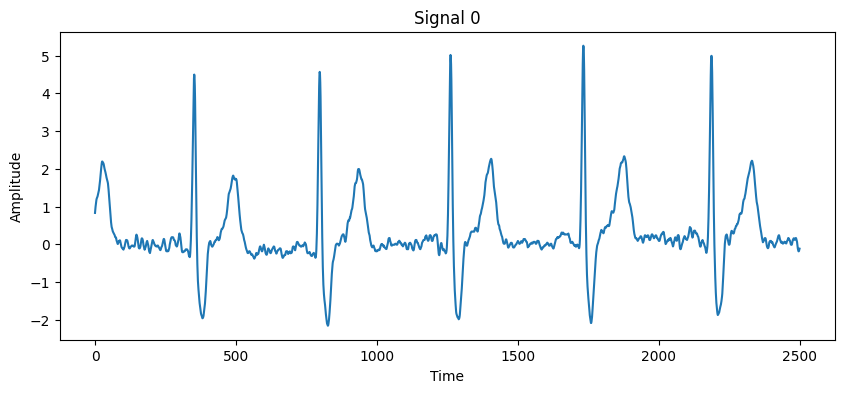

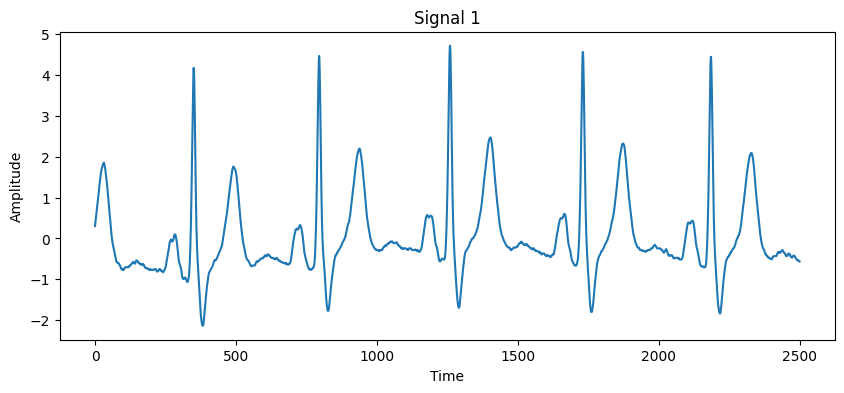

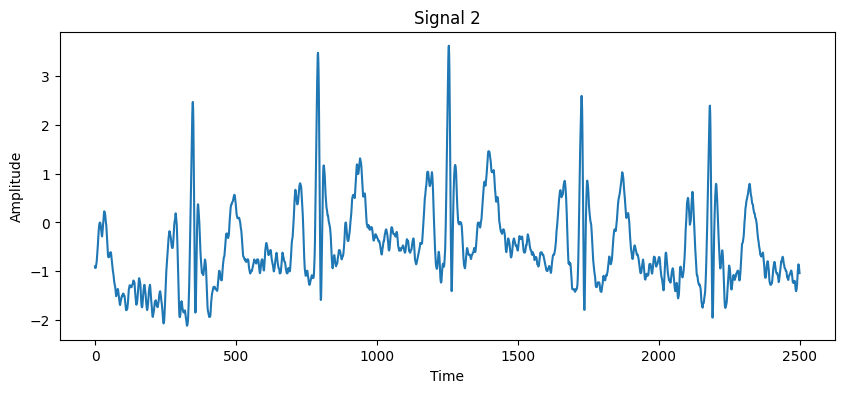

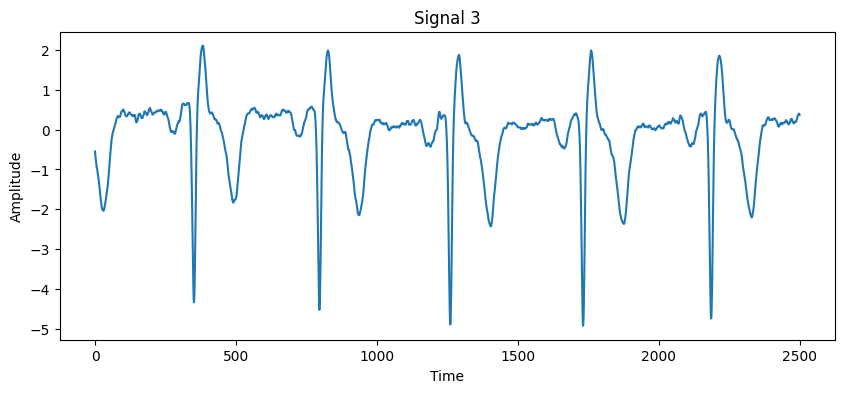

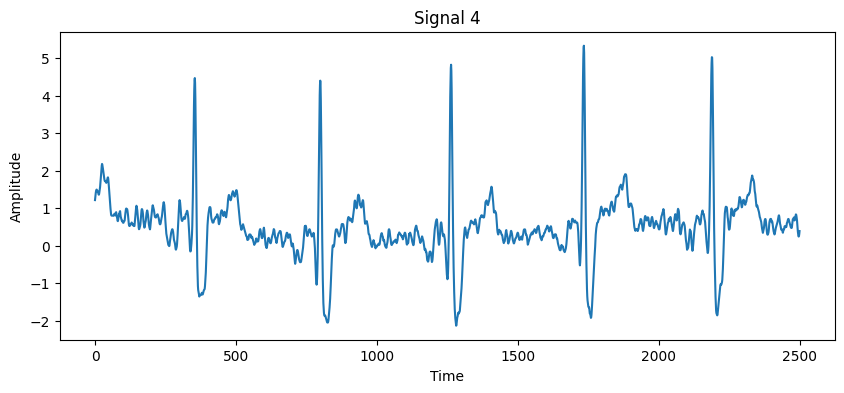

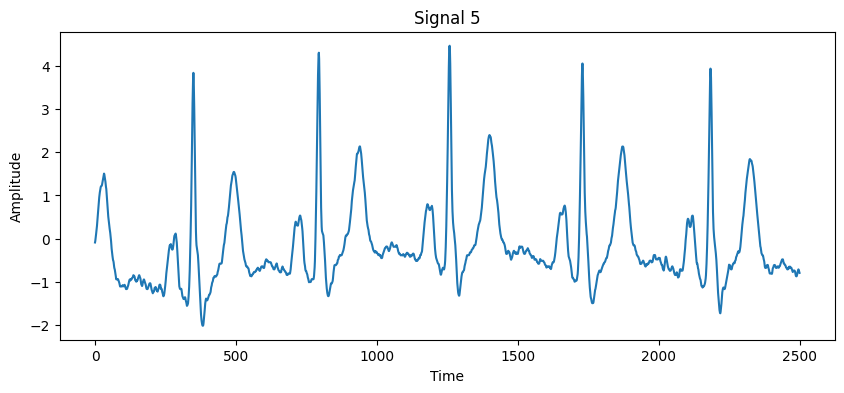

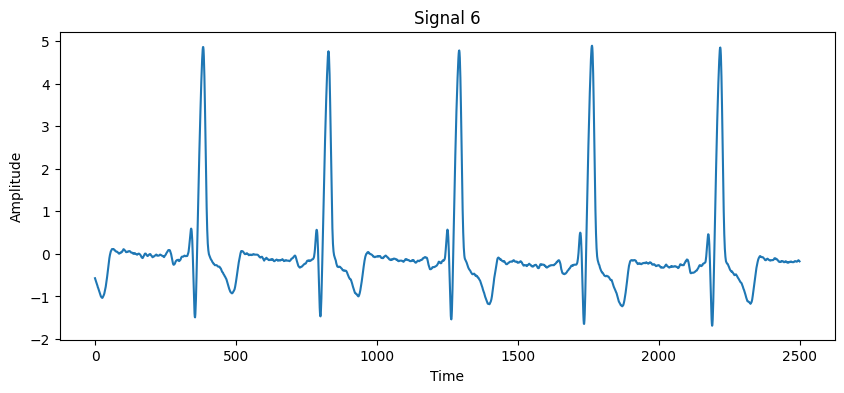

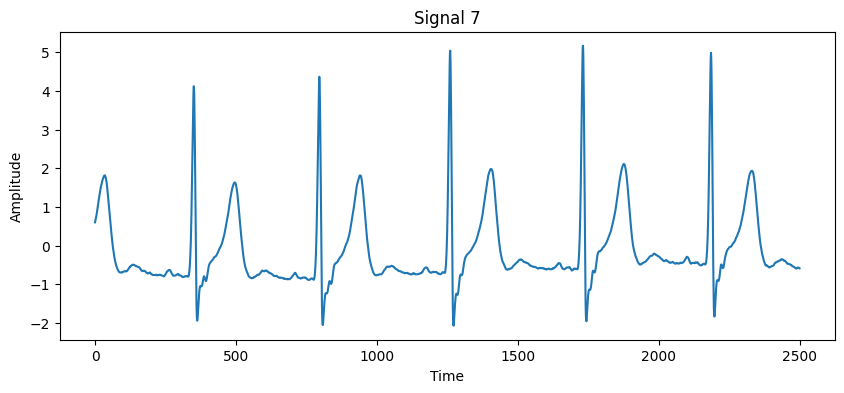

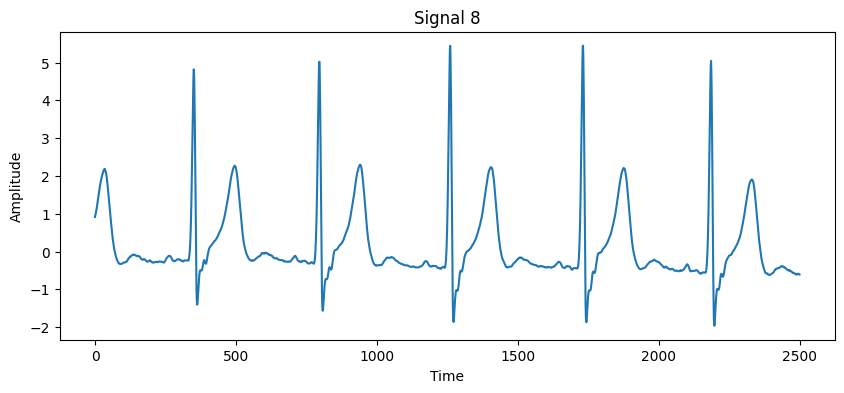

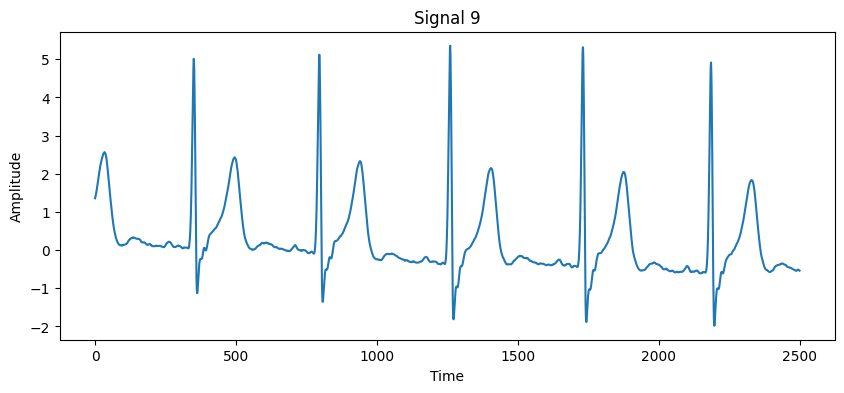

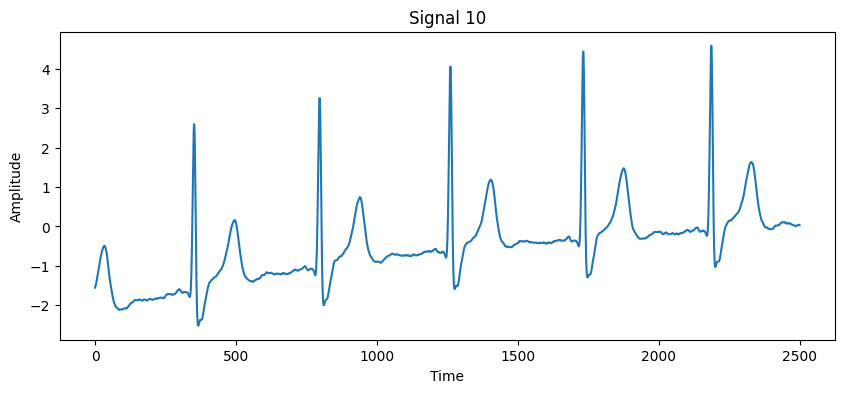

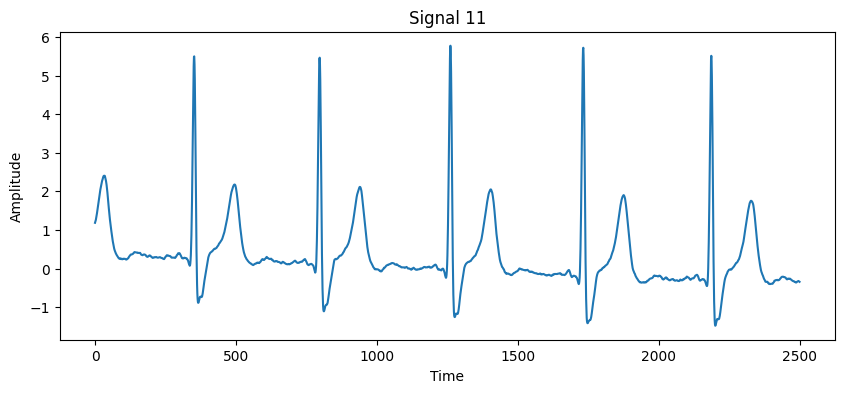

In [54]:
import matplotlib.pyplot as plt
import scipy.io

# Load the .mat file
mat_file_path = os.path.join(root, 'data/code_15/segmented/code_15_270272_0.mat')
mat_data = scipy.io.loadmat(mat_file_path)

# Inspect the keys in the .mat file
print(mat_data.keys())

# Extract the ECG signals using the correct key
ecg_signals = mat_data['segment_i']  # Replace 'feats' with the correct key if different

mat_data['feats'].shape
# Plot each row of the 'feats' array as a time series signal
for i, signal in enumerate(mat_data['feats']):
    plt.figure(figsize=(10, 4))
    plt.plot(signal)
    plt.title(f'Signal {i}')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.show()